## Ontario Population & Average Rent vs Shelter Occupancy Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import plot_regress_exog
import statsmodels.api as sm
from statsmodels.formula.api import ols

%config InlineBackend.figure_format = 'retina'

In [2]:
df_on_q = pd.read_csv("./17100009-eng/ontario_quarterly.csv")
df_on_q

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Ontario,2016A000235,Persons,249,units,0,v12,7,13972735,NaN,NaN,NaN,0
1,2017-04,Ontario,2016A000235,Persons,249,units,0,v12,7,14008134,NaN,NaN,NaN,0
2,2017-07,Ontario,2016A000235,Persons,249,units,0,v12,7,14072615,NaN,NaN,NaN,0
3,2017-10,Ontario,2016A000235,Persons,249,units,0,v12,7,14152156,NaN,NaN,NaN,0
4,2018-01,Ontario,2016A000235,Persons,249,units,0,v12,7,14188919,NaN,NaN,NaN,0
5,2018-04,Ontario,2016A000235,Persons,249,units,0,v12,7,14241379,NaN,NaN,NaN,0
6,2018-07,Ontario,2016A000235,Persons,249,units,0,v12,7,14318545,NaN,NaN,NaN,0
7,2018-10,Ontario,2016A000235,Persons,249,units,0,v12,7,14405726,NaN,NaN,NaN,0
8,2019-01,Ontario,2016A000235,Persons,249,units,0,v12,7,14441694,NaN,NaN,NaN,0
9,2019-04,Ontario,2016A000235,Persons,249,units,0,v12,7,14484242,NaN,NaN,NaN,0


In [3]:
df_on_q.drop(df_on_q.columns.difference(['REF_DATE','GEO','VALUE']), 1, inplace=True)
df_on_q

,REF_DATE,GEO,VALUE
0,2017-01,Ontario,13972735
1,2017-04,Ontario,14008134
2,2017-07,Ontario,14072615
3,2017-10,Ontario,14152156
4,2018-01,Ontario,14188919
5,2018-04,Ontario,14241379
6,2018-07,Ontario,14318545
7,2018-10,Ontario,14405726
8,2019-01,Ontario,14441694
9,2019-04,Ontario,14484242


In [4]:
df17 = pd.read_csv("daily-shelter-occupancy-2017-fix-postalcode.csv")
df18 = pd.read_csv("daily-shelter-occupancy-2018-fix-postalcode.csv")
df19 = pd.read_csv("daily-shelter-occupancy-2019-fix-postalcode.csv")

In [5]:
df17["OCCUPANCY_DATE"] = pd.to_datetime(df17["OCCUPANCY_DATE"]).dt.to_period("Q")
df18["OCCUPANCY_DATE"] = pd.to_datetime(df18["OCCUPANCY_DATE"]).dt.to_period("Q")
df19["OCCUPANCY_DATE"] = pd.to_datetime(df19["OCCUPANCY_DATE"]).dt.to_period("Q")

In [6]:
df17_date_occ = df17[["OCCUPANCY_DATE", "OCCUPANCY"]].groupby('OCCUPANCY_DATE').sum()
df18_date_occ = df18[["OCCUPANCY_DATE", "OCCUPANCY"]].groupby('OCCUPANCY_DATE').sum()
df19_date_occ = df19[["OCCUPANCY_DATE", "OCCUPANCY"]].groupby('OCCUPANCY_DATE').sum()

df= pd.concat([df17_date_occ,df18_date_occ,df19_date_occ])
df.insert(1,"On_pop",df_on_q['VALUE'].tolist())

In [7]:
df

,OCCUPANCY,On_pop
OCCUPANCY_DATE,,
2017Q1,414363,13972735
2017Q2,439327,14008134
2017Q3,455496,14072615
2017Q4,476873,14152156
2018Q1,526523,14188919
2018Q2,590562,14241379
2018Q3,596509,14318545
2018Q4,609590,14405726
2019Q1,615818,14441694


In [8]:
df.corr().loc["OCCUPANCY","On_pop"]

0.9184563743668599

In [9]:
TRREBpath = 'https://raw.githubusercontent.com/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/master/Rental%20Data/'

trrebData = pd.read_csv(TRREBpath + 'TRREB-Quarterly-Data.csv')
trrebData['Average'] = pd.to_numeric(trrebData['Average'])
trrebData['rent_date'] = pd.to_datetime(trrebData['rent_date'])
trrebData = trrebData.set_index('rent_date')


df.insert(2,"Average_Rent",trrebData['Average'].tolist())

In [10]:
df

,OCCUPANCY,On_pop,Average_Rent
OCCUPANCY_DATE,,,
2017Q1,414363,13972735,1791
2017Q2,439327,14008134,1861
2017Q3,455496,14072615,1976
2017Q4,476873,14152156,1970
2018Q1,526523,14188919,1995
2018Q2,590562,14241379,2055
2018Q3,596509,14318545,2163
2018Q4,609590,14405726,2143
2019Q1,615818,14441694,2143


Text(0.5, 1.0, 'Ontario Population time series plot')

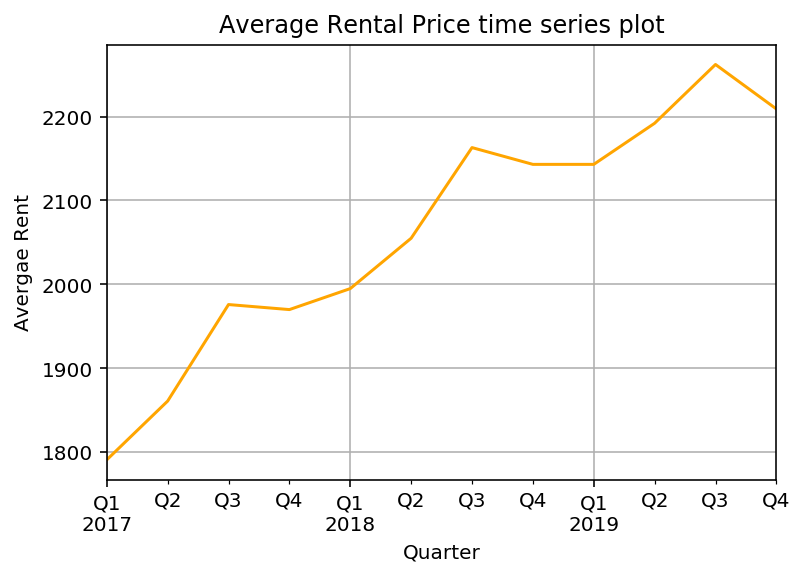

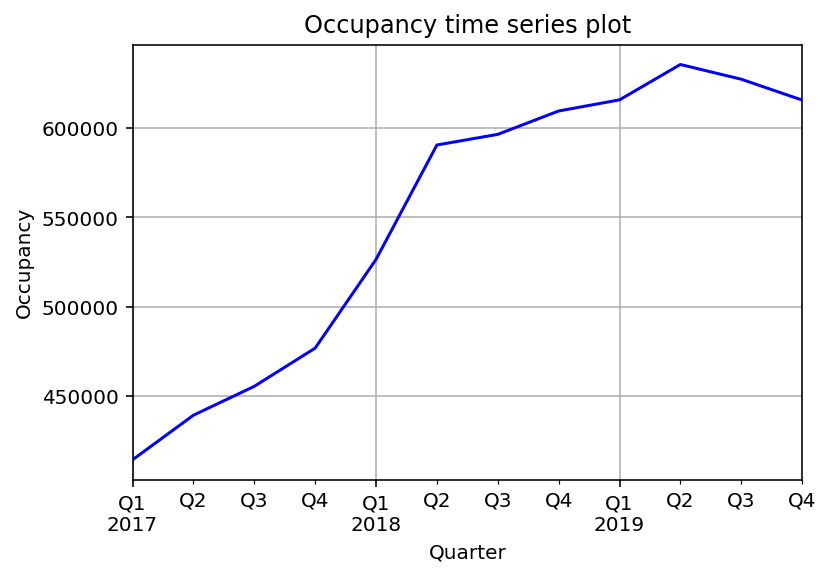

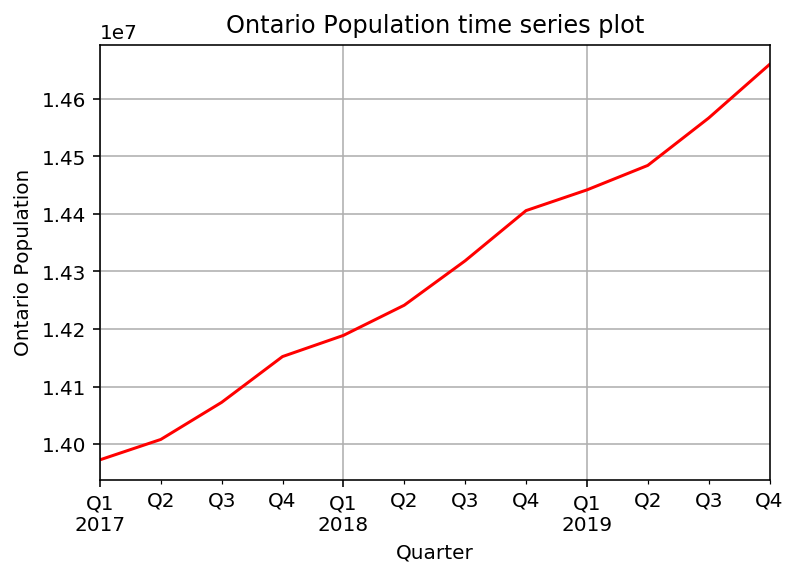

In [11]:
plt.figure()
df.Average_Rent.plot(grid=True, color='orange')
plt.xlabel('Quarter')
plt.ylabel('Avergae Rent')
plt.title('Average Rental Price time series plot')


plt.figure()
df.OCCUPANCY.plot(grid=True, color='blue')
plt.xlabel('Quarter')
plt.ylabel('Occupancy')
plt.title('Occupancy time series plot')

plt.figure()
df.On_pop.plot(grid=True, color='red')
plt.xlabel('Quarter')
plt.ylabel('Ontario Population')
plt.title('Ontario Population time series plot')

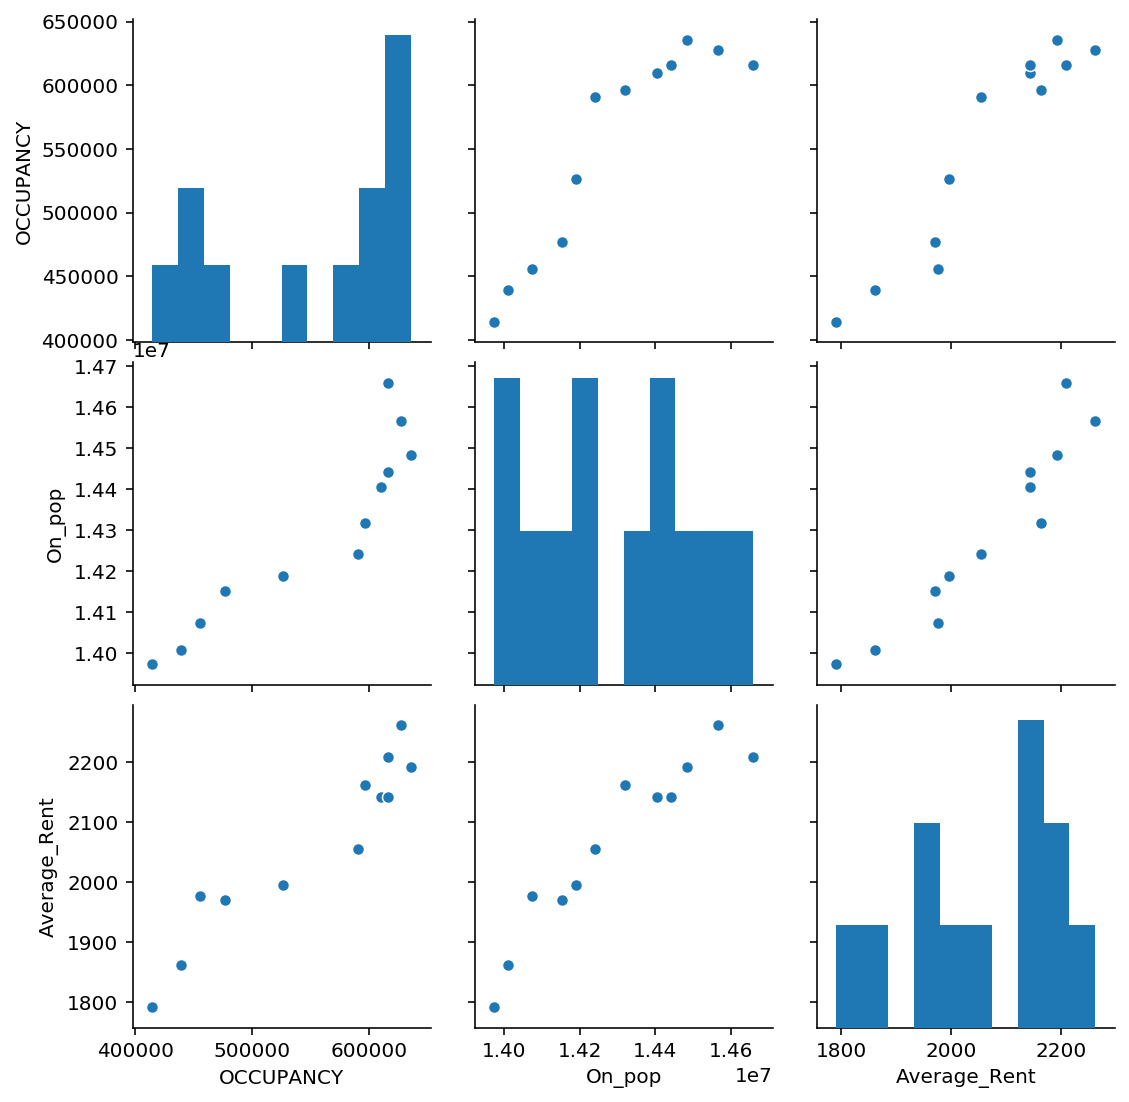

In [12]:
sns.pairplot(df)

In [13]:
df[['OCCUPANCY','Average_Rent','On_pop']].corr()

,OCCUPANCY,Average_Rent,On_pop
OCCUPANCY,1.000000,0.950202,0.918456
Average_Rent,0.950202,1.000000,0.947730
On_pop,0.918456,0.947730,1.000000


In [14]:
reg_df = ols('OCCUPANCY ~ Average_Rent+ On_pop', data = df).fit()
reg_df.summary()

C:\Users\Mahshad\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              OCCUPANCY   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.39e-05
Time:                        14:52:44   Log-Likelihood:                -138.16
No. Observations:                  12   AIC:                             282.3
Df Residuals:                       9   BIC:                             283.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.29e+06   1.35e+06     -0.959      0.363   -4.33e+06    1.75e+06
Average_Rent   440.9795    180.265      2.446      0.037      33.192     848.766
On_pop           0.0651      0.118      0.550      0.596      -0.203       0.333
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.216
Skew:                           0.028   Prob(JB):                        0.898
Kurtosis:                       2.346   Cond. No.                     2.38e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

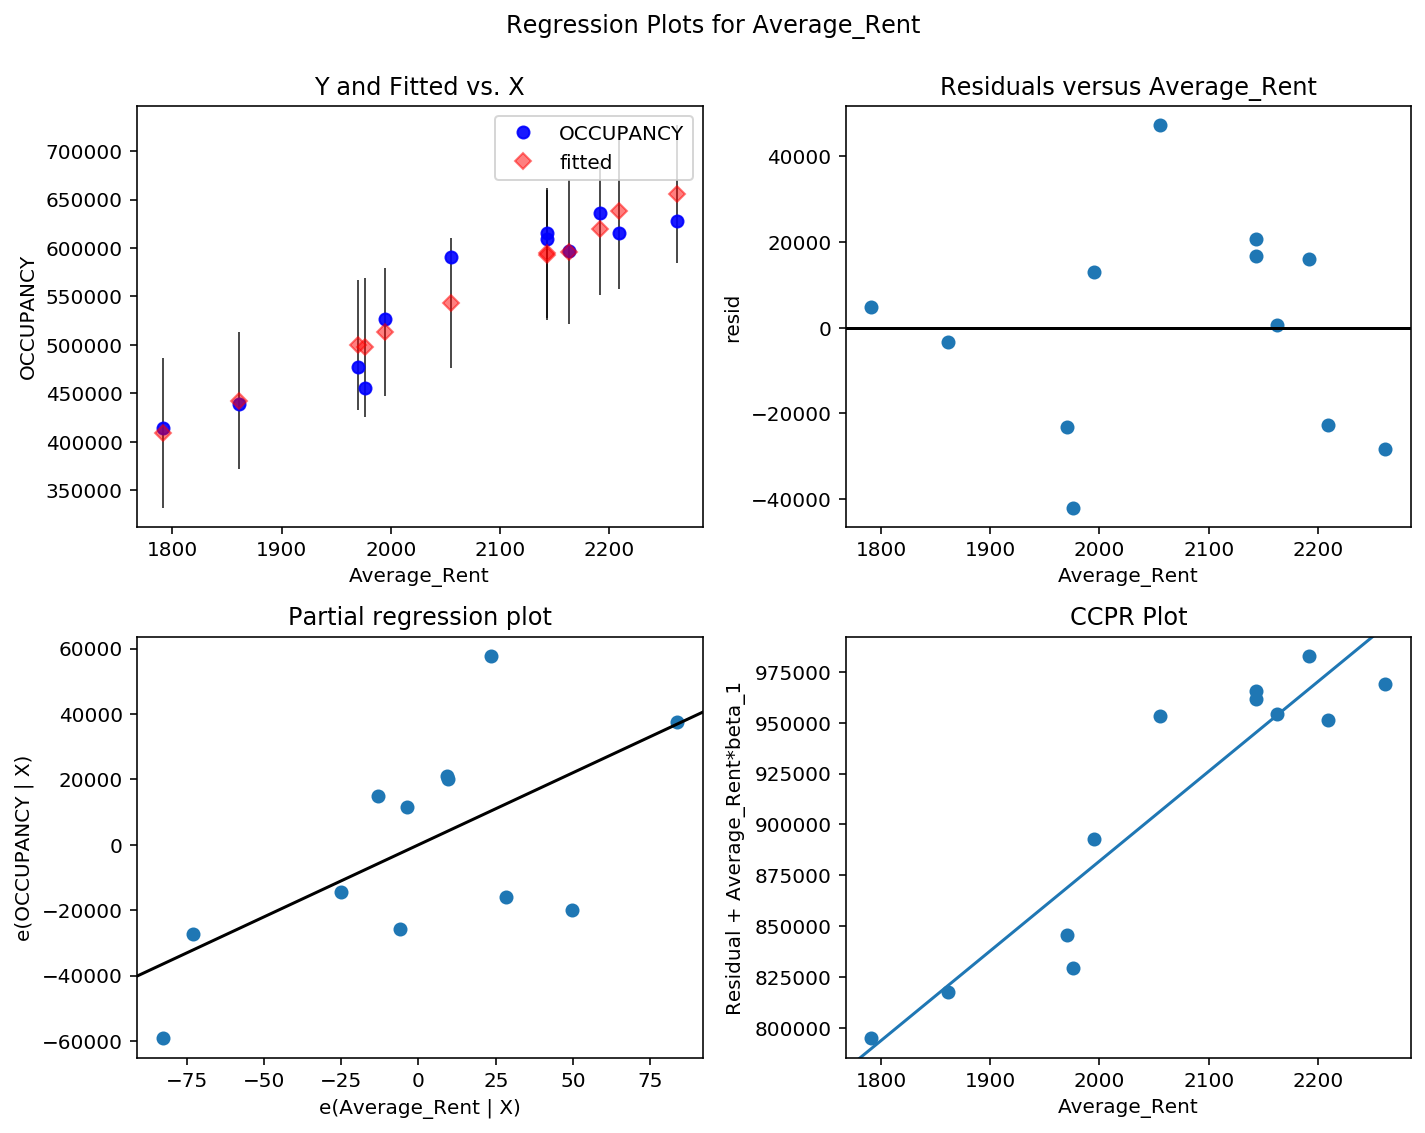

In [15]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(reg_df, "Average_Rent", fig = fig)

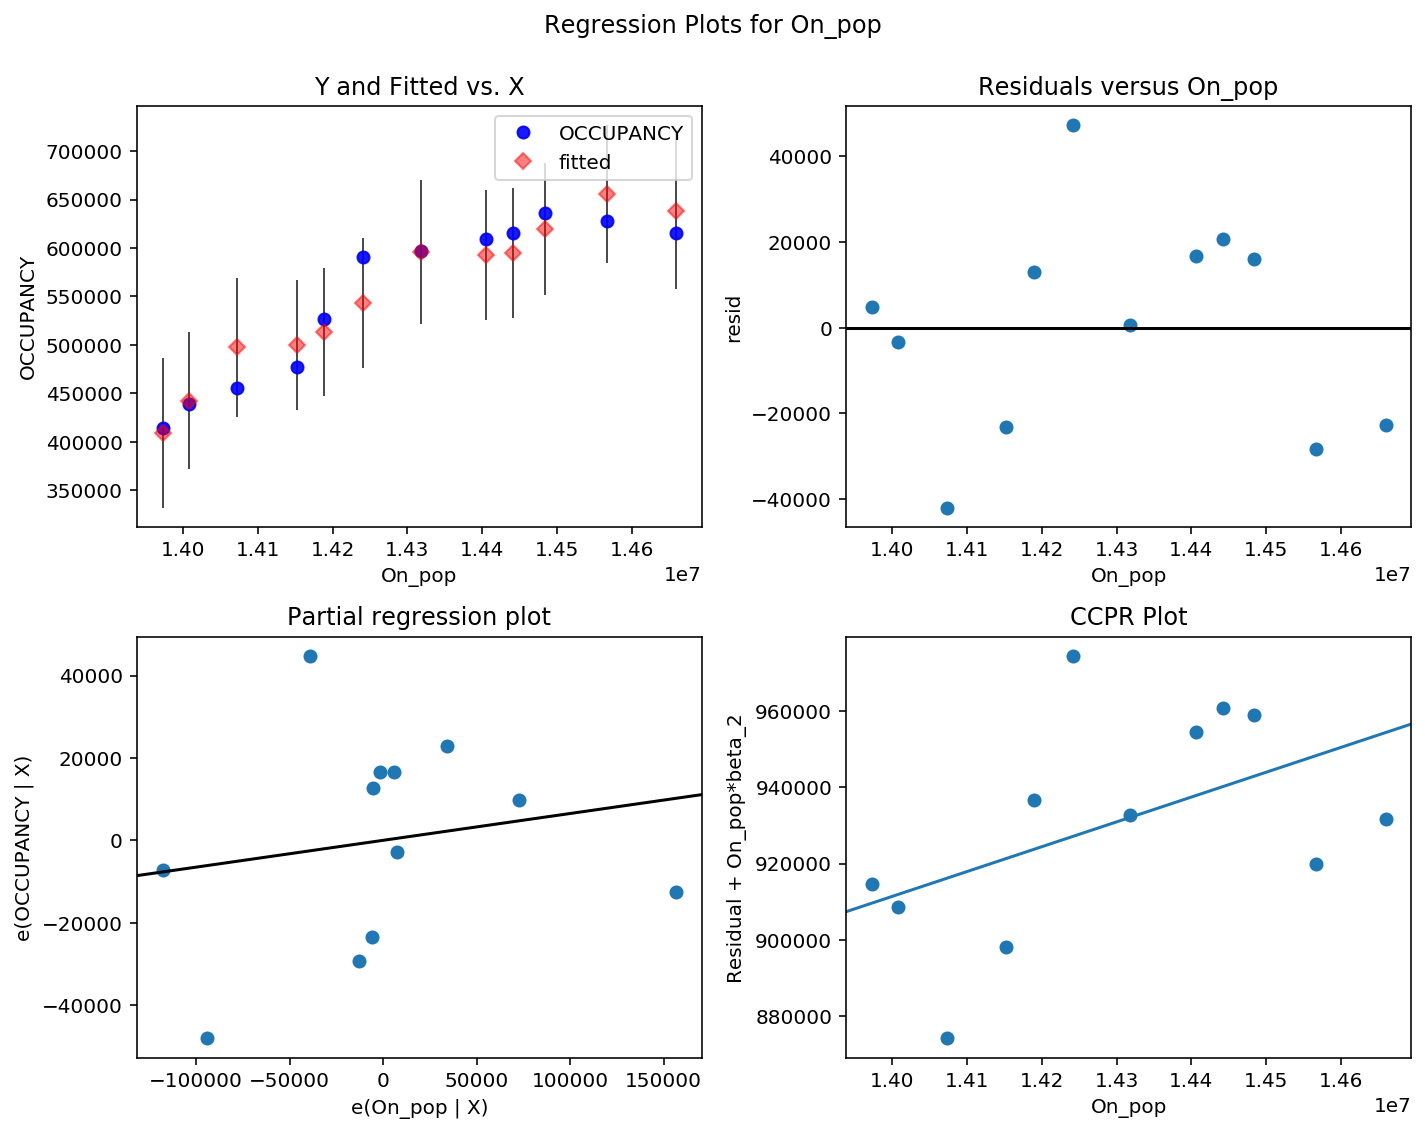

In [16]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(reg_df, "On_pop", fig = fig)

In [17]:
reg_df = ols('OCCUPANCY ~ Average_Rent', data = df).fit()
reg_df.summary()

C:\Users\Mahshad\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              OCCUPANCY   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     92.97
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.22e-06
Time:                        14:52:46   Log-Likelihood:                -138.36
No. Observations:                  12   AIC:                             280.7
Df Residuals:                      10   BIC:                             281.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.533e+05   1.15e+05     -4.823      0.001   -8.09e+05   -2.98e+05
Average_Rent   534.8904     55.474      9.642      0.000     411.286     658.495
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.230
Skew:                          -0.213   Prob(JB):                        0.891
Kurtosis:                       2.472   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

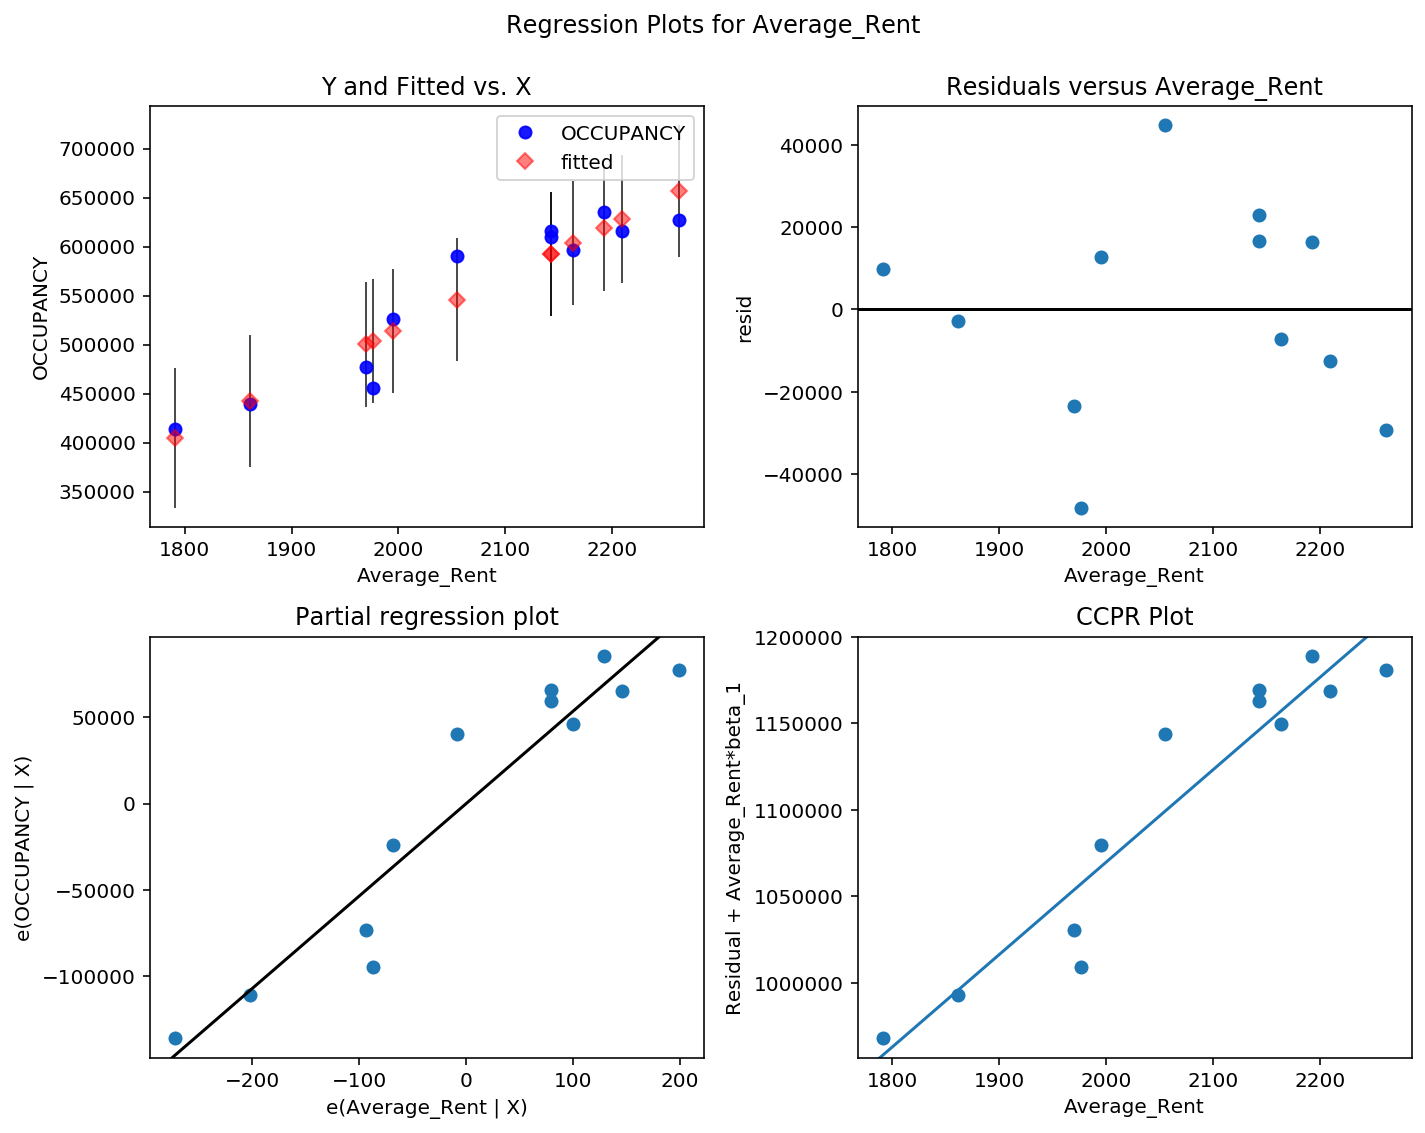

In [18]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(reg_df, "Average_Rent", fig = fig)